# **Analysis of Breast Cancer Data** 


My data was sourced from an open source website Kaggle. My dataset contained information on patients who had been diagnosed with various stages of breast cancer and I focussed on the Age, Gender, Tumour_Stage, Surgery_Type, Histology, Patient_Status columns. I wanted to find out from my data if Female’s are at a higher risk and more often diagnosed with breast cancer than Male’s which is commonly believed and also found in a study, (Ly et al., 2013), through my research . I also wanted to analyse the the average age for this diagnosis, as it is often said that younger people are less likely at risk for breast cancer. Below I have provided an image of a breast cancer awareness ribbon which is often worn during the month of October. In this assignment I will explore several relationships, with a focus on age, gender, the various tumour stages, histology, surgery types and the survival of the patient. I also created a histogram of the Histology, which is the study of the cell anatomy (College of Canyons), and the type of surgeries which were carried out and tried to build relationships between the two. I also tried to analyse relationships between the Date_of_Surgery and Dat_of_Last_Visit and Patient_Status which did not make sense and highlight this in my assignment.
 


![image.svg](https://upload.wikimedia.org/wikipedia/commons/b/b5/Pink_ribbon.svg)
###### <sub> MesserWoland, Creative Commons License, via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Pink_ribbon.svg) </sub>

### **Data Collection**

In [11]:
#Importing various libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Loading the data 
breastcancer = pd.read_csv('BRCA.csv')




### **Data cleaning** 
The breast cancer data set  had 24 instances of missing data rows upon downloading the CSV file. These were removed for ease of readability and exploratory analyses. I replaced the Patient survival columns so that Dead was represented by 1 and Alive was represented by 0.  

In [13]:
#removal of missing data rows
breastcancer = breastcancer.dropna(axis=0)




#replacing the Patient_Status columns stats, for calculations ease
breastcancer = breastcancer.replace({'Patient_Status': { 'Dead':1,  'Alive': 0}})


## **Analyses** 
I began my analysis by understanding the age distribution of breast cancer patients in my dataset. This histogram shows that the highest number of patients were older than 45 and younger than around 67 years old. The distribution was also incredibly saturated between the ages of 50 and 60. 

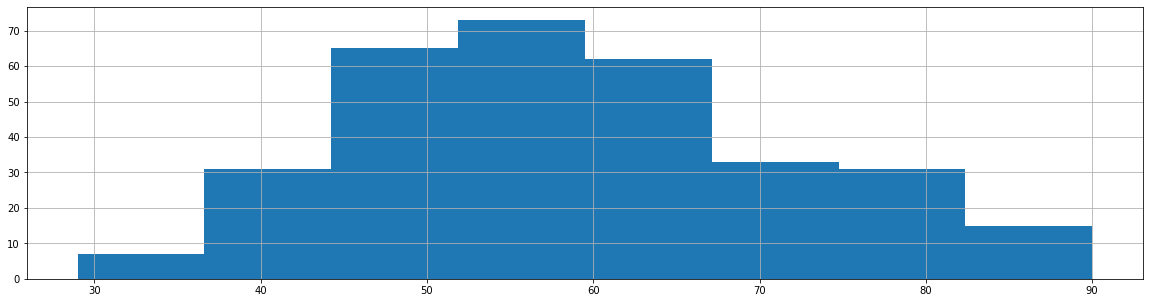

In [14]:
#Distributions of ages of cancer patients
ages_hist = breastcancer.Age.hist(bins=8, figsize=(20,5), grid = True)

I carried out a descriptive analysis of the breast cancer dataset's age column. The oldest patient was 90 years old and the youngest patient was 29. This helps create a better understanding of the age distribution of the histogram above. 

In [15]:
#Age stats 
ds = breastcancer.Age.describe()
print(f"Mean age: {round(ds['mean'], 1)}")
print(f"Maximum age: {round(ds['max'], 1)}")
print(f"Minimum age: {round(ds['min'], 1)}")



Mean age: 58.7
Maximum age: 90.0
Minimum age: 29.0


The breast cancer dataset showed that the Female to Male distribution was greatly unequal. This proved the research study mentioned in my intoduction as well as common knowledge that Female's are at a greater risk of being diagnosed with breast cancer. 

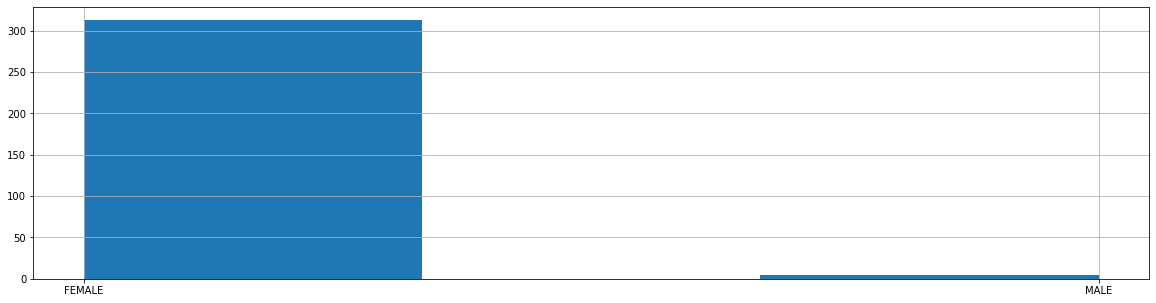

In [16]:
#male vs female histogram distribution 
mvf = breastcancer.Gender.hist(bins=3, figsize =(20,5))

Fortunately, there are several breast cancer survivors  according to the histogram below. The greater bar represents the survivors, while the smaller bar represents the non-survivors. 

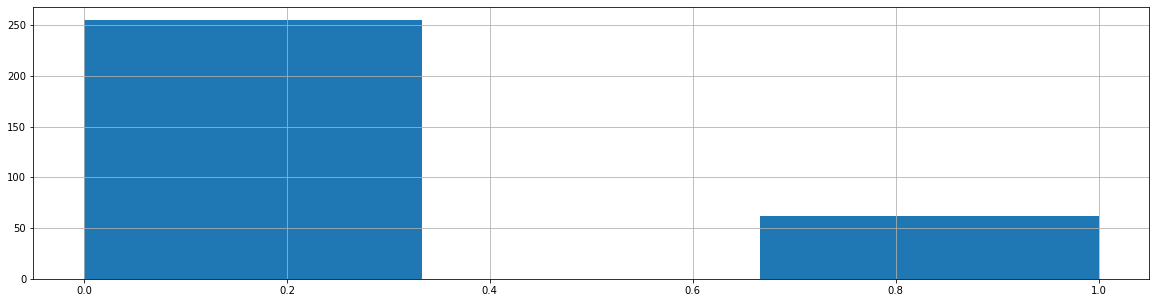

In [17]:
DvsA = breastcancer.Patient_Status.hist(bins=3, figsize= (20,5))

### **Patient age and patient survival**
The mean age of patient who survived versus patients who did not survive breast cancer was very close. Therefore, no relationship could be determined through this analyses. From this, I could conclude that age of the patient does not affect their survival chance. 

In [18]:
#Age of patients who are alive vs age of patients who are dead
print(f"Alive: {round(breastcancer.loc[breastcancer.Patient_Status == 0].Age.mean(),1)}")
print(f"Dead: {round(breastcancer.loc[breastcancer.Patient_Status == 1].Age.mean(),1)}")

Alive: 58.8
Dead: 58.4


### **Relationship of tumour stage, gender and survival of patient**
A summary table was created to determine the relationship of tumour stage, gender and survival of the patient. This table shows that the dataset had no males diagnosed with Stage I tumour and that only 1 male died due to breast cancer. Most females were diagnosed with a stage II tumour and that is the stage at which the most deaths occured.

In [19]:
#Replacing patient status again for ease of table reading and plotting
breastcancer = breastcancer.replace({'Patient_Status': { 1: 'Dead', 0:'Alive'}})

#Grouped operations, used to form of table
grouped_breastcancer = breastcancer.groupby(['Tumour_Stage', 'Gender', 'Patient_Status']).size().unstack()
print(grouped_breastcancer)

Patient_Status       Alive  Dead
Tumour_Stage Gender             
I            FEMALE   51.0   9.0
II           FEMALE  142.0  35.0
             MALE      2.0   1.0
III          FEMALE   59.0  17.0
             MALE      1.0   NaN


### **Patients death based on tumour stage**
The plot below shows that according to the data, the greatest amount of patient deaths occured at tumour stage 2. 

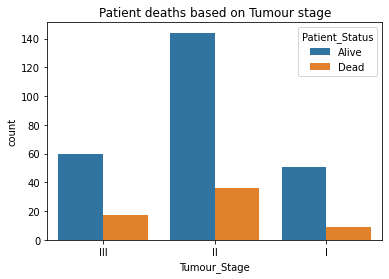

In [20]:
breastcancer_plot = sns.countplot(data=breastcancer, x = "Tumour_Stage", hue="Patient_Status" ).set(title="Patient deaths based on Tumour stage")

### **Relationship between gender, survival and tumour stage of cancer**
According to the plot below, Female survivors exceeded Male survivors but only because there was a larger pool of Female breast cancer patients. The deaths of Female breast cancer patients also exceeded those of Male breast cancer patients because there were more Female breast cancer patients than Males. This confirms that Female's are at a greater risk of being diagnosed with breast cancer. 

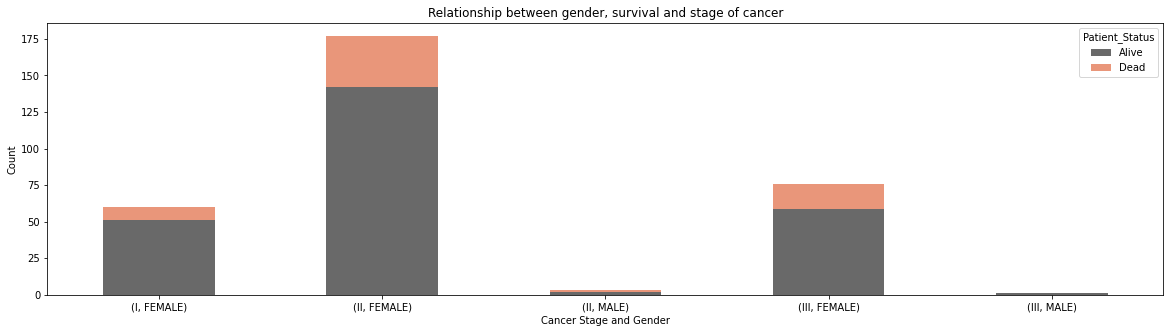

In [21]:
#grouped panda plotting, to determine relationship between gender, survival and cancer stage
breastcancer_barplot = grouped_breastcancer.plot.bar(stacked=True, color=['#696969',  '#E9967A'],figsize =(20,5), title="Relationship between gender, survival and stage of cancer")
plt.ylabel("Count")
plt.xlabel("Cancer Stage and Gender")
plt.xticks(rotation=0)
plt.show(breastcancer_barplot)

### **Histologies** 
According to the histogram below, there were 3 types of histologies in my dataset. The greatest was an Infiltrating Ductal Carcinoma. According to the National Cancer Institute, an Infiltrating Ductal Carcinoma is the most common type of breast cancer. This has been proven through my dataset analyses. 

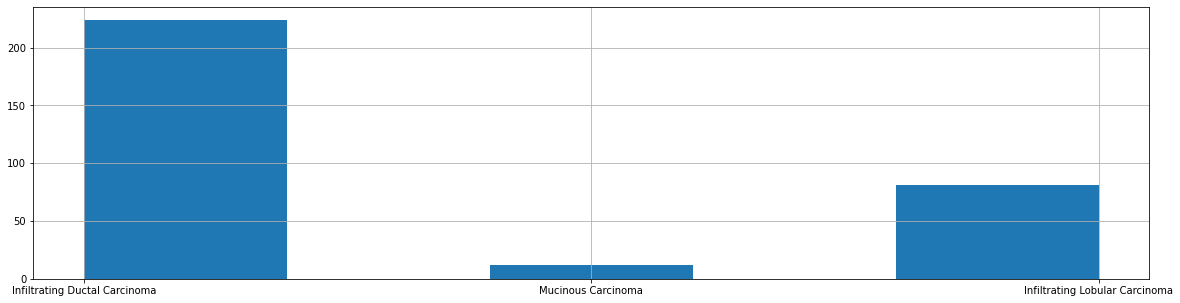

In [22]:
#histogram of type of histologies
#mention what histologies are in markdown
histologies = breastcancer.Histology.hist(bins= 5, figsize =(20,5))

### **Type of surgeries**
According to the dataset, there were 4 types of surgeries for the breast cancer removal. The only one that has no description is labelled "other". The most common type of surgery according to the dataset is Modified Radical Mastectomy. According to Cleveland Clinic,  Mastectomy's are breast removal surgeries and are the most common because they treat late and early stage breast cancer and it is a preventative measure. Lumpectomy, which conserves the breast tissue is an alternative for when the cancer is early stage and has not spread, (Cleveland Clinic).

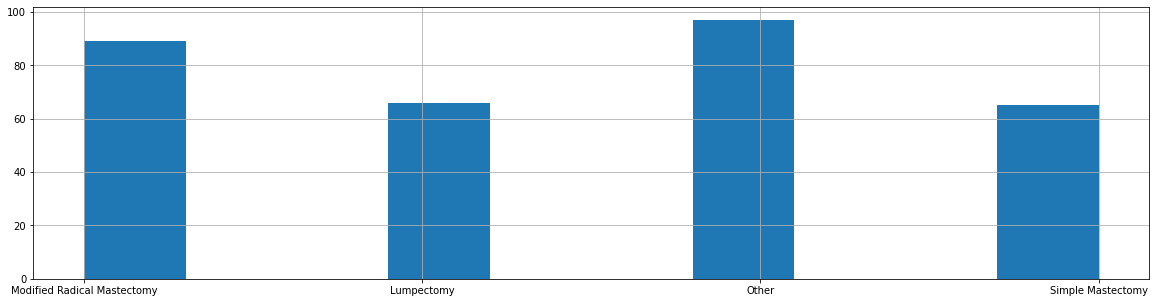

In [75]:
#histogram of type of surgeries 
surgeries = breastcancer.Surgery_type.hist(bins=10, figsize=(20,5))

### **Summary table to build relationship between Histology and Surgery types**
 grouped data table was created to create plots and form relationships. 

In [59]:
#grouped data to show relationship b/w the histologies and surgeries
grouped_histologies_surgeries_genage= breastcancer.groupby(['Histology', 'Surgery_type']).size().unstack()
print(grouped_histologies_surgeries_genage)

Surgery_type                    Lumpectomy  Modified Radical Mastectomy  \
Histology                                                                 
Infiltrating Ductal Carcinoma         48.0                         61.0   
Infiltrating Lobular Carcinoma        13.0                         23.0   
Mucinous Carcinoma                     5.0                          5.0   

Surgery_type                    Other  Simple Mastectomy  
Histology                                                 
Infiltrating Ductal Carcinoma    66.0               49.0  
Infiltrating Lobular Carcinoma   31.0               14.0  
Mucinous Carcinoma                NaN                2.0  


The plot below shows that for each type of Histology or breast cancer type, Mastectomy surgery is the most common. 

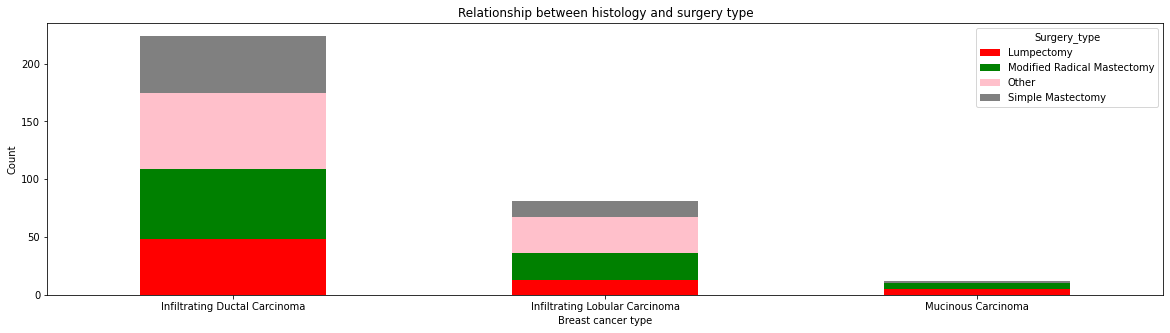

In [60]:
#plotting graph for clearer visual 
breastcancer_barplot2 = grouped_histologies_surgeries_genage.plot.bar(stacked=True,color=['red', 'green', 'pink', 'grey'],figsize =(20,5), title="Relationship between histology and surgery type")
plt.ylabel("Count")
plt.xlabel("Breast cancer type")
plt.xticks(rotation=0)
plt.show(breastcancer_barplot2)

### **Relationship between date of last surgery, date of last visit and status of patient**
For this relationship, I tried to create a summary table and then a plot. But the Summary table was less of a summary as there are several dates of surgery and dates of last visit. It seemed that there was no relationship of those dates with the patient survival/status.

In [61]:
#Relationship of date of surgery, date of last visit, status of patient 
grouped_surgerydates= breastcancer.groupby(['Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status']).size().unstack()
print(grouped_surgerydates)

Patient_Status                      Alive  Dead
Date_of_Surgery Date_of_Last_Visit             
01-Apr-19       30-Jan-20             1.0   NaN
01-Dec-17       08-Jun-18             1.0   NaN
01-Jan-19       22-Apr-20             1.0   NaN
01-Mar-18       01-Jun-19             1.0   NaN
                06-Feb-20             1.0   NaN
...                                   ...   ...
31-Jan-19       01-Dec-19             NaN   1.0
31-Mar-18       03-Oct-18             NaN   1.0
                16-Nov-19             1.0   NaN
31-May-19       08-Nov-19             1.0   NaN
                22-Aug-20             1.0   NaN

[316 rows x 2 columns]


### **Plot for the above summary table**
In the figure below, it is hard to make any analyses, as the table did not provide a useful summary to make any connections or relationships. Thus I could not use this information for my benefit. 

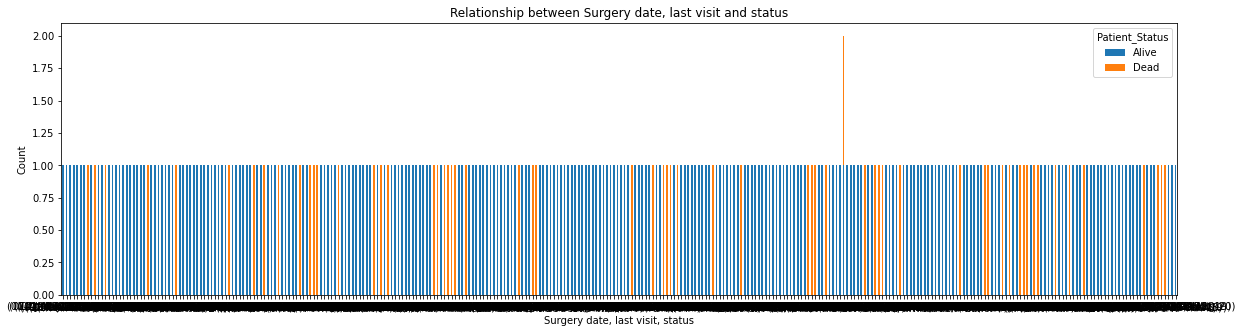

In [62]:
surgery_barplot = grouped_surgerydates.plot.bar(stacked=True,figsize =(20,5), title="Relationship between Surgery date, last visit and status")
plt.ylabel("Count")
plt.xlabel("Surgery date, last visit, status")
plt.xticks(rotation=0)
plt.show(surgery_barplot)

#according to this, there is too much of a scatter of dates for any realistic connections to be made with the data

## **Discussion**

In this assignment I explored data from a breast cancer dataset and focused on several  relationships between breast cancer patient age, gender, survival, tumour stage. I also did research to understand breast cancer better, and related the exploratory analyses from my dataset with scientific facts about breast cancer. My exploratory analyses proved that Females are more at risk of breast cancer than Males and that because of this, there were both more deaths as a result of breast cancer in Females but also more Female survivors of breast cancer compared to men, mostly because the dataset had more Female patients than Male patients. Mean age of patients survival versus non-survival did not seem to provide any useful information. According to my research from the National Cancer Institute, I found that the most common type of breast cancer was an Infiltrating Ductal Carcinoma and this was true in my dataset and analyses as well. I also found from my dataset that the most common surgery on breast cancer patients was Mastectomy’s which according to Cleveland Clinic is the most common type of surgery which removes the breast. I made a table to build a relationship between the type of breast cancer's / histology’s and the type of surgery, and it was confirmed that an Infiltrating Ductal Carcinoma was the most common breast cancer and Mastectomy’s were the most common type of surgery’s. Also, I tried to create a relationship between the date of surgery, date of last visit and status of patient survival but this did not provide any useful statistics which I could carry out an exploratory analyses of or answer any questions.  

As Women are at greater risk of breast cancer according to the dataset, it is important for women to regularly have checkups to make sure that they are not suffering from breast cancer and make sure that they take the correct steps in order to have a higher chance of survival. The death rate for breast cancer is lower than survival rate, so there is always a chance to reduce or control the cancer. It also important for people to get educated about breast cancer and raise awareness for it.



## **References**
1. **Source data** -  https://www.kaggle.com/datasets/amandam1/breastcancerdataset?select=BRCA.csv

2. **Pandas for data manipulation, creating histograms, tables etc**

3. **Matplotlib for data visualization**

4. **Seaborn for data visualization**

5. **A research study on female and male cases of breast cancer** - Ly, D., Forman, D., Ferlay, J., Brinton, L. A., & Cook, M. B. (2013). An international comparison of male and female breast cancer incidence rates. International journal of cancer, 132(8), 1918–1926. https://doi.org/10.1002/ijc.27841

6. **Histology definition** - Histology. canyons.edu. (n.d.). Retrieved November 27, 2022, from https://www.canyons.edu/academics/biology/resources/lab107/histology.php#:~:text=Histology%20is%20the%20study%20of,light%20microscope%20or%20electron%20microscope 

7. **Research on the most common type of breast cancer surgery** - Breast cancer surgery. Cleveland Clinic. (2022, May 18). Retrieved November 27, 2022, from https://my.clevelandclinic.org/health/treatments/8338-breast-cancer-surgery#:~:text=breast%20reconstruction%20surgery.-,Mastectomy,mastectomy%20as%20a%20preventative%20measure 

8. **Most common type of breast cancer /Histology** - NCI Dictionary of Cancer terms. Cancer. (n.d.). Retrieved November 27, 2022, from https://www.cancer.gov/publications/dictionaries/cancer-terms/def/infiltrating-ductal-carcinoma 